In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.gridspec as gridspec 
from datetime import datetime 
from scipy.stats import skew 
from scipy.special import boxcox1p 
from scipy.stats import boxcox_normmax 
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.svm import SVR 
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import sklearn.linear_model as linear_model 
import matplotlib.style as style 
import seaborn as sns 
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

from sklearn import metrics 
from sklearn.datasets import load_iris 
from sklearn import preprocessing

In [2]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv') 

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data exploration

In [4]:
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[:20] #Overqual, Garage and Area are important. #Multiasdsafadfs-rity is present though (garage cars/area)

SalePrice       1.000000
OverallQual     0.625652
GrLivArea       0.502149
GarageCars      0.410124
GarageArea      0.388667
TotalBsmtSF     0.376481
1stFlrSF        0.367057
FullBath        0.314344
TotRmsAbvGrd    0.284860
YearBuilt       0.273422
YearRemodAdd    0.257151
GarageYrBlt     0.236548
MasVnrArea      0.228000
Fireplaces      0.218023
BsmtFinSF1      0.149320
LotFrontage     0.123763
WoodDeckSF      0.105244
2ndFlrSF        0.101974
OpenPorchSF     0.099765
HalfBath        0.080717
Name: SalePrice, dtype: float64

In [5]:
def plotting_3_chart(df, feature): 
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns 
    import matplotlib.pyplot as plt 
    import matplotlib.gridspec as gridspec 
    from scipy import stats 
    import matplotlib.style as style 
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

C:\Users\AMAN ULLAH\.conda\envs\Computer vision_Deep learning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AMAN ULLAH\.conda\envs\Computer vision_Deep learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMAN ULLAH\.conda\envs\Computer vision_Deep learning\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\AMAN ULLA

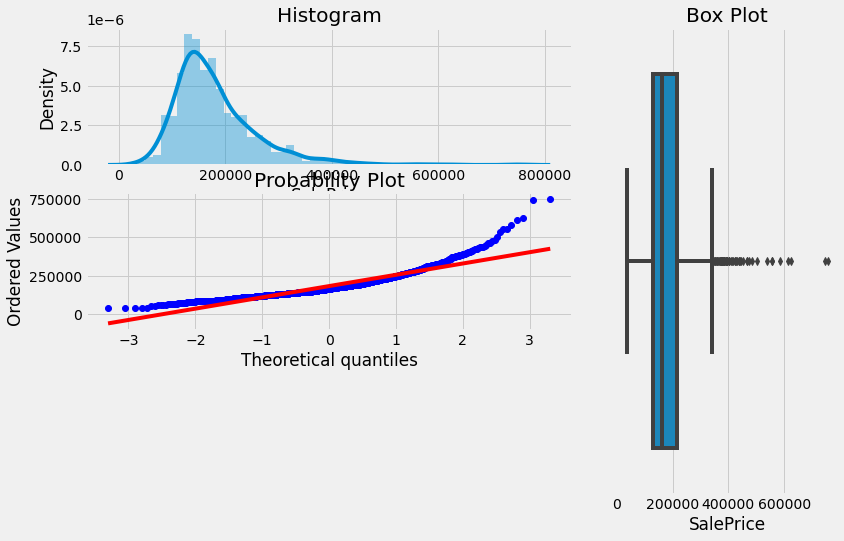

In [6]:
plotting_3_chart(train, 'SalePrice') #uses the dataset + target

In [7]:
train["SalePrice"] = np.log1p(train["SalePrice"]) #logarithms to normalize, because Email did it and it looked good

In [8]:
all_data = pd.concat((train, test)).reset_index(drop = True) 
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [9]:
all_data.drop(['SalePrice'], axis = 1, inplace = True)

all_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
NA_as_none = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'MSZoning']

for i in NA_as_none: 
    all_data[i] = all_data[i].fillna('None') 

    

In [11]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


# Data cleaning

Some features consist of numbers that are actually categories so we'll convert to str so they get binarized later

In [12]:
all_data['OverallCond'] = all_data['OverallCond'].astype(str) 
all_data['OverallQual'] = all_data['OverallQual'].astype(str) 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str) 
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str) 
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str) 
all_data['YrSold'] = all_data['YrSold'].astype(str) 
all_data['MoSold'] = all_data['MoSold'].astype(str)

# Stealing a function for missing values

Visualising the amount of missing data + the type

In [13]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    return pd.concat([total, percent, data_type], axis=1, keys=['Total','Percent','Type'])
missing_percentage(all_data)

,Total,Percent,Type
LotFrontage,486,16.65,float64
MasVnrArea,23,0.79,float64
Utilities,2,0.07,object
BsmtHalfBath,2,0.07,float64
Functional,2,0.07,object
BsmtFullBath,2,0.07,float64
Electrical,1,0.03,object
Exterior2nd,1,0.03,object
Exterior1st,1,0.03,object
GarageArea,1,0.03,float64


# Data cleaning of missing values, through either Mode, 0 or as per description


There are ordinal scales which will be converted to numbers

In [14]:
def Dup(x): 
    return list(dict.fromkeys(x))
def addS(z): 
    z = "'" + str(z) + "'" 
    return z
def remove_values_from_list(the_list, val): 
    return [value for value in the_list if value != val]

columns_2_order = ['LotShape', 'Utilities', 'LandSlope','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual' , 'GarageCond', 'PoolQC', 'Fence']
    
for c_order in columns_2_order: 
    n = len(Dup(all_data[c_order])) 
    sample_dic = {} 
    vlist = [] 
    nlist = [] 
    
    for val in Dup(all_data[c_order]):
        vlist.append(val)
        nlist.append(n)
        n-=1
        
    sample_dic = dict(zip(vlist, nlist))

    all_data[c_order] = all_data[c_order].map(sample_dic) 

In [15]:
all_data['Functional'] = all_data['Functional'].fillna('Typical') #Functional: Home functionality (Assume typical unless deductions are warranted) 
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(0) #if data ismissing, there is none ... I guess 
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0) 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') #default values 
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0) 
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0) 
all_data['BsmtFinSF1'] = all_data['BsmtFinSF2'].fillna(0) 
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0) 
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0) 
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0) 
all_data['SaleType'] = all_data['SaleType'].fillna("Oth") 
all_data['GarageCars'] = all_data['GarageCars'].fillna(0) 
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0) 
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr') #default values 
all_data['GarageArea'] = all_data['GarageArea'].fillna(0) 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) #filling with mode 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0]) 
all_data['KitchenQual'] = all_data['BsmtFinSF1'].fillna(all_data['Exterior2nd'].mode()[0])



In [16]:
missing_percentage(all_data)

,Total,Percent,Type


# Feature selection, no method used here - just common sence #domain knowldege

In [17]:
all_data['TotalSQFT'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] #basement + floor 1 + floor 2

all_data['Yearbuilt/remodelled'] = (all_data['YearBuilt'] + all_data['YearRemodAdd'])

#these are str values, so this is effecitvely concatenating them and creatig like a bajilion dummies later

all_data['BSMT'] = all_data['1stFlrSF'] + all_data['2ndFlrSF']

#1st + 2nd floor ... named basement cause life is confusing

all_data['TotalBathrooms'] = (all_data['FullBath'] + (all_data['HalfBath']) + all_data['BsmtFullBath'] + (all_data['BsmtHalfBath']))

#total bathrooms

# Literally dummie columns of the house - does it have pool, 2nd floor, garage, basement and fireplace
Supposedly this eliminates multiasdadasd-rity

In [18]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0) 
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0) 
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0) 
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0) 
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Let's get dummies from categorical columns

In [19]:
final_features = pd.get_dummies(all_data).reset_index(drop=True) 
final_features

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Yearbuilt/remodelled_20052007,Yearbuilt/remodelled_20062006,Yearbuilt/remodelled_20062007,Yearbuilt/remodelled_20072007,Yearbuilt/remodelled_20072008,Yearbuilt/remodelled_20082008,Yearbuilt/remodelled_20082009,Yearbuilt/remodelled_20092009,Yearbuilt/remodelled_20092010,Yearbuilt/remodelled_20102010
0,1,65.0,8450,4,3,3,196.0,4,5,5,...,0,0,0,0,0,0,0,0,0,0
1,2,80.0,9600,4,3,3,0.0,3,5,5,...,0,0,0,0,0,0,0,0,0,0
2,3,68.0,11250,3,3,3,162.0,4,5,5,...,0,0,0,0,0,0,0,0,0,0
3,4,60.0,9550,3,3,3,0.0,3,5,4,...,0,0,0,0,0,0,0,0,0,0
4,5,84.0,14260,3,3,3,350.0,4,5,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,21.0,1936,4,3,3,0.0,3,5,4,...,0,0,0,0,0,0,0,0,0,0
2915,2916,21.0,1894,4,3,3,0.0,3,5,4,...,0,0,0,0,0,0,0,0,0,0
2916,2917,160.0,20000,4,3,3,0.0,3,5,4,...,0,0,0,0,0,0,0,0,0,0
2917,2918,62.0,10441,4,3,3,0.0,3,5,5,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#del final_features['Id']
final_features.drop(['Id'], axis = 1, inplace = True) 
final_features

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Yearbuilt/remodelled_20052007,Yearbuilt/remodelled_20062006,Yearbuilt/remodelled_20062007,Yearbuilt/remodelled_20072007,Yearbuilt/remodelled_20072008,Yearbuilt/remodelled_20082008,Yearbuilt/remodelled_20082009,Yearbuilt/remodelled_20092009,Yearbuilt/remodelled_20092010,Yearbuilt/remodelled_20102010
0,65.0,8450,4,3,3,196.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,4,3,3,0.0,3,5,5,5,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,3,3,3,162.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,3,3,3,0.0,3,5,4,4,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,3,3,3,350.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,3,3,0.0,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
2915,21.0,1894,4,3,3,0.0,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
2916,160.0,20000,4,3,3,0.0,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
2917,62.0,10441,4,3,3,0.0,3,5,5,5,...,0,0,0,0,0,0,0,0,0,0


# Spliting the data in two for Test/Train

In [21]:
X = final_features[:1460]

X_test = final_features[1460:]

y = pd.DataFrame(data =train["SalePrice"]) #needs to be a shape apperantly, same number of rows

# PCA

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() #this is a requirement for pca .. otherwise it breaks 
X = sc.fit_transform(X)

In [23]:
pca_com = 250 
pca = PCA(n_components=1213) #978 
X = pca.fit_transform(X)

In [24]:
explained_variance = pca.explained_variance_ratio_ #X_train #explained varience is pretty self explanotory

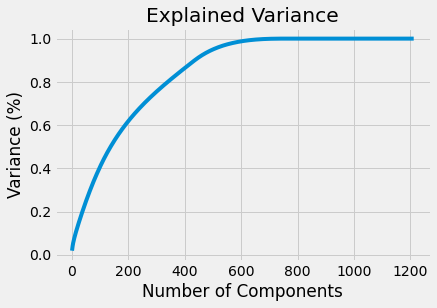

In [25]:
plt.figure() 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of Components') 
plt.ylabel('Variance (%)') 
plt.title('Explained Variance') 
plt.show()

# PCA results

Around 250 components make 80% of the variance, so Paretto bitch!!!! , I'll be taking the 250 components (aside from ID) that have the highest quadratic variance and dropping literally everything else

The following code literally says, order the columns by their variance and take the first 250

In [26]:
Var_matrix =(pd.concat([pd.DataFrame(list(final_features.columns), columns=["Factors"] ) ,pd.DataFrame(list(explained_variance**2), columns=["^2 Variance"] )] , axis=1).sort_values(by='^2 Variance', ascending = False)[0:pca_com])

list(Var_matrix['Factors']) 
X_new = final_features[list(Var_matrix['Factors'])]

X_new.dtypes

LotFrontage       float64
LotArea             int64
LotShape            int64
Utilities           int64
LandSlope           int64
                   ...   
YearBuilt_1975      uint8
YearBuilt_1976      uint8
YearBuilt_1977      uint8
YearBuilt_1978      uint8
YearBuilt_1979      uint8
Length: 250, dtype: object

In [28]:
X_train = X_new[:1460] #respliting data 
X_test = X_new[1460:] #respliting data

# Linear regression

In [29]:
X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(X_train, y, test_size=0.4)

X_train_T.shape, y_train_T.shape 
X_test_T.shape, y_test_T.shape

((584, 250), (584, 1))

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
model = linear_model. Ridge(alpha=20)

model = model.fit(X_train_T, y_train_T)

predictions_T = model.predict(X_train_T)

y_hat_test = model.predict(X_test_T)

Text(0, 0.5, 'Predictions')

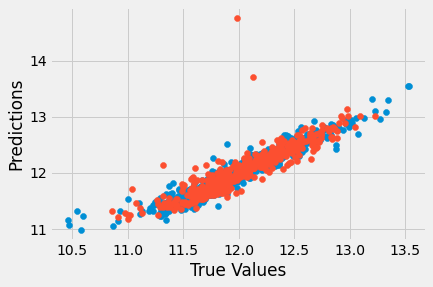

In [33]:
plt.scatter(y_train_T, predictions_T)
plt.xlabel('True Values') 
plt.ylabel('Predictions')
plt.scatter(y_test_T, y_hat_test) 
plt.xlabel('True Values') 
plt.ylabel('Predictions')

# Evaluation

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_T, y_hat_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_T, y_hat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_T, y_hat_test))) 
print('Root Mean Squared Logarithmic Error:', np.sqrt(metrics.mean_squared_error(y_test_T, y_hat_test)))

Mean Absolute Error: 0.09743223901724513
Mean Squared Error: 0.03389488155924335
Root Mean Squared Error: 0.18410562609340148
Root Mean Squared Logarithmic Error: 0.18410562609340148


# predict the train values

In [35]:
y_pred = model.predict(X_test) #predicting the values y_pred

y_pred,y 
Pred = pd.DataFrame(y_pred, columns=['SalePrice']) 
df1 = pd.concat([y, Pred], axis=1)

# Predicted vs actuall value predictions

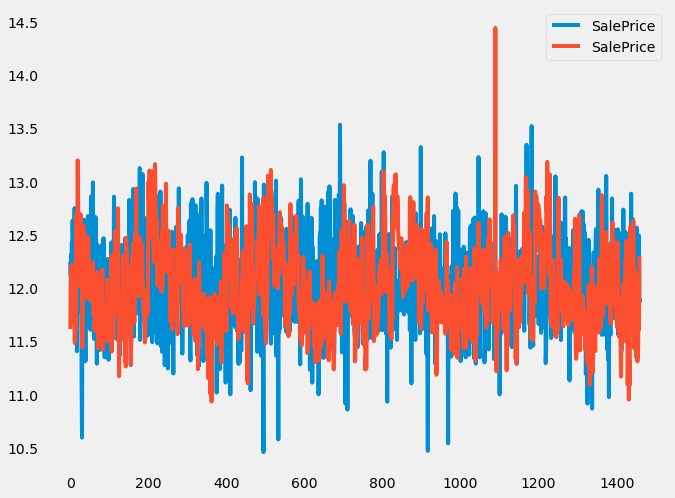

In [36]:
df1.plot(kind='line',figsize=(10,8)) 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white') 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
plt.show()

Exponential is the reverse of log according to the little statistics 
I know / internet tells me
Reversing the values so that I can submit the file

In [37]:
Regresult = np.expm1(y_pred) #creating a data frame for the export file with saleprice and ID 
Regresult = pd.DataFrame(Regresult, columns=['SalePrice']) 
test["Id"].shape, Regresult.shape 
test_t = pd.DataFrame(test["Id"])

# Output and submission

In [38]:
my_submission = pd.concat([test_t, Regresult ], axis=1)

In [40]:
my_submission.to_csv('KaggleSubmission.csv', index=False)

my_submission

,Id,SalePrice
0,1461,110793.754347
1,1462,170808.603310
2,1463,191211.152893
3,1464,202192.604392
4,1465,201326.286147
...,...,...
1454,2915,87893.748545
1455,2916,95944.510992
1456,2917,185555.410739
1457,2918,110331.676820
